# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from collections import deque
from ddpg_agent import Agent
import torch
import matplotlib.pyplot as plt

"""
Implementation of DDPG - an algorithm which concurrently learns a Q-function and a policy.

Params:
    episodes - integer representing maximum number of iterations
Return:
    scores - list of all averages of all the agents scores for each episode 
"""
def deep_deterministic_policy_gradient(episodes = 1000):
    scores_100 = deque(maxlen = 100)
    scores = []
    
    for episode in range(episodes):
        # reset the environment, get current state and 
        # agents scores (for each of the 20 agents)
        environment = env.reset(train_mode = True)[brain_name]
        curr_states = environment.vector_observations
        curr_agents_scores = np.zeros(num_agents)
        mean_score = 0
        agent.reset()
        
        for step in range(2000):
            # send all actions and get next states and rewards
            curr_actions = agent.act(curr_states)
            environment = env.step(curr_actions)[brain_name]
            next_states = environment.vector_observations
            curr_rewards = environment.rewards
            
            # check if the episode is finished
            is_finished = environment.local_done
            
            # make a next step, update states and scores
            agent.step(curr_states, curr_actions, curr_rewards, next_states, is_finished, step)
            curr_states = next_states
            curr_agents_scores += curr_rewards
            
            if np.any(is_finished): break
        
        # update scores and 100 continuoues scores lists
        curr_score = np.mean(curr_agents_scores)
        scores.append(np.mean(curr_score))
        scores_100.append(np.mean(curr_score))
        
        print('Episode: {}, Score: {}, Max_Score: {}'.format(episode, curr_score, np.max(scores)))
        
        if episode != 0 and episode % 10 == 0:
            print('Current average:', np.mean(scores_100))
            
        # check if the environment is solved
        if len(scores_100) == 100 and np.mean(scores_100) >= 30:
            torch.save(agent.actor_local.state_dict(), 'actor_weights.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_weights.pth')
            break
              
    return  scores

In [8]:
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 8)
scores = deep_deterministic_policy_gradient()

Episode: 0, Score: 0.5589999875053764, Max_Score: 0.5589999875053764
Episode: 1, Score: 0.27799999378621576, Max_Score: 0.5589999875053764
Episode: 2, Score: 0.12099999729543924, Max_Score: 0.5589999875053764
Episode: 3, Score: 0.08849999802187085, Max_Score: 0.5589999875053764
Episode: 4, Score: 0.03899999912828207, Max_Score: 0.5589999875053764
Episode: 5, Score: 0.052999998815357684, Max_Score: 0.5589999875053764
Episode: 6, Score: 0.09749999782070518, Max_Score: 0.5589999875053764
Episode: 7, Score: 0.04949999889358878, Max_Score: 0.5589999875053764
Episode: 8, Score: 0.05049999887123704, Max_Score: 0.5589999875053764
Episode: 9, Score: 0.1289999971166253, Max_Score: 0.5589999875053764
Episode: 10, Score: 0.0549999987706542, Max_Score: 0.5589999875053764
Current average: 0.138181815093
Episode: 11, Score: 0.040499999094754456, Max_Score: 0.5589999875053764
Episode: 12, Score: 0.11999999731779099, Max_Score: 0.5589999875053764
Episode: 13, Score: 0.1599999964237213, Max_Score: 0.558

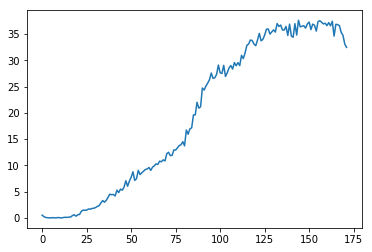

In [9]:
import matplotlib.pyplot as plt

# plot the 100 consecutive scores average
plt.plot(scores)
plt.show()

In [12]:
# test loading the weights
torch.load('actor_weights.pth')

OrderedDict([('fc1.weight',
              tensor([[-5.6920e-01,  4.9079e-01,  5.4036e-02,  ..., -9.8431e-01,
                       -6.0770e-02, -1.6672e+00],
                      [ 2.7951e-01, -6.7725e-01, -2.5012e-01,  ..., -5.3218e-01,
                        4.0439e-02,  2.1862e+00],
                      [-3.7487e-01,  1.0480e-01,  5.0113e-01,  ..., -2.6950e-01,
                        2.3063e-02,  1.9591e+00],
                      ...,
                      [-1.4759e-01, -5.0917e-01,  2.5387e-01,  ..., -4.1037e-01,
                        5.5372e-02, -1.4304e+00],
                      [ 1.3944e-01,  5.6462e-01, -3.4015e-01,  ..., -9.9595e-01,
                        5.6458e-02, -9.3357e-01],
                      [-2.4218e-01,  9.2092e-01, -1.4550e-03,  ..., -8.5305e-01,
                        1.7348e-02,  2.0568e+00]], device='cuda:0')),
             ('fc1.bias',
              tensor([-0.8780, -0.6347, -0.4072, -0.4306, -0.0360, -0.1937, -0.2483,
                      -0.402